# **Manual básico de análsis de datos**

### **Importar las librerias a utilizar**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# **Cargar Datos desde un CSV**

In [57]:
url="https://raw.githubusercontent.com/conectivaoficial/analisis-tech/refs/heads/main/consumo.csv"
df=pd.read_csv(url)
df.head()

,Edad,Ingresos,Num_Compras,Tiempo_Sitio,Num_Productos_Vistos
0,22,30000,5,30,10
1,35,70000,15,60,20
2,58,80000,10,45,30
3,24,25000,4,20,8
4,45,50000,20,70,25


# **Exploración de Datos**
La exploración de datos es la primera etapa para comprender qué tan adecuados son los datos para el análisis. Los pasos iniciales consisten en visualizar los primeros registros, obtener una descripción general del DataFrame y observar las estadísticas.
## **Comandos**
*   Mostrar las primeras filas del DataFrame

    df.head()
*   Mostrar las últimas filas del DataFrame

    df.tail()
*   Mostrar información general del DataFrame

    df.info()
*   Mostrar estadísticas descriptivas del DataFrame

    df.describe()
*   Mostrar los nombres de las columnas

    df.columns
*   Mostrar el tipo de datos de cada columna

    df.dtypes

# **Limpieza y Preparación de Datos**

Es fundamental limpiar los datos antes de analizarlos, ya que los datos sucios pueden llevar a conclusiones erróneas. Los pasos incluyen el manejo de valores nulos, la conversión de tipos de datos y la eliminación de duplicados.

## **Comandos**

*   Convertir la columna 'Fecha' a tipo datetime
    
    df['Fecha'] = pd.to_datetime(df['Fecha'])

*   Verificar si hay valores nulos en el DataFrame
    
    df.isnull().sum()

*   Rellenar valores nulos (si hubiera)

    df.fillna(0, inplace=True)

*    Eliminar duplicados (si hubiera)

    df.drop_duplicates(inplace=True)

# **Análisis de Datos**
Una vez que los datos están limpios, es importante realizar un análisis descriptivo básico para obtener estadísticas clave.

## **Comandos:**

*   Calcular la media de una columna:
    
    df['Columna'].mean()

*   Calcular la desviación estándar de una columna:
    
    df['Columna'].std()

*   Calcular el valor máximo de una columna:
    
    df['Columna'].max()

*   Calcular el valor mínimo de una columna:
    
    df['Columna'].min()

*   Calcular la mediana de una columna:
    
    df['Columna'].median()

*   Calcular la moda de una columna:
    
    df['Columna'].mode()

*   Calcular la correlación entre las columnas:
    
    df.corr()

    *  Apoyo con mapa de calor

            plt.figure(figsize=(8, 6))
            plt.title("Matriz de Correlación")
            plt.imshow(correlaciones, cmap='coolwarm', interpolation='none')
            plt.colorbar()
            plt.xticks(np.arange(5), data.columns, rotation=45)
            plt.yticks(np.arange(5), data.columns)
            plt.show()

*   Apoyo con gráfico de histogramas
    
        df['Columna'].hist(bins=30, edgecolor='black')
        plt.title('Histograma de Columna')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.show()

* Apoyo con gráficos de disperción

        plt.scatter(df['Columna1'], df['Columna2'])
        plt.title('Gráfico de dispersión entre Columna1 y Columna2')
        plt.xlabel('Columna1')
        plt.ylabel('Columna2')
        plt.show()




# **Detección de Valores Atípicos (Outliers)**

Detectar valores atípicos usando el método de IQR (Interquartile Range): Los valores atípicos suelen estar fuera del rango del primer cuartil (Q1) y tercer cuartil (Q3).

## **Comandos**

* Calcular los cuartiles
    
      Q1 = df['Columna'].quantile(0.25)
      Q3 = df['Columna'].quantile(0.75)
      IQR = Q3 - Q1
      outliers = df[(df['Columna'] < (Q1 - 1.5 * IQR)) | (df['Columna'] > (Q3 + 1.5 * IQR))]
      print(outliers)

* Función para encontrar datos atípicos

      anomalias=[]
      #creamos una funcion que, encuentra los atipico o outliers
      def buscar_anomalias(dataframe):
        df_std=dataframe.std()
        df_mean=dataframe.mean()
        corteAnomalo=df_std*2
        limite_menor=df_mean-corteAnomalo
        limite_mayor=df_mean+corteAnomalo
        print(limite_menor.iloc[0])
        print(limite_mayor.iloc[0])

      #generacion de las anomalias
      for index, row in dataframe.iterrows():
        outlier=row # obtener columna    fila: columna1|columna2|columna3
        if (outlier.iloc[0]>limite_mayor.iloc[0]) or (outlier.iloc[0]<limite_menor.iloc[0]):
          anomalias.append(index)
      return anomalias

      #Lllamada a la función

      buscar_anomalias(df)

*   Apoyo con diagrama de cajas y bigotes

        plt.boxplot(df['Columna'])
        plt.show()


# **Agrupamientos y Agregaciones**

En muchas ocasiones, necesitarás agrupar los datos por ciertas categorías y realizar agregaciones. Esto es útil para analizar datos por segmentos o categorías específicas.

## **Comandos**

* Agrupar los datos por una columna y calcular la media de cada grupo:
df.groupby('ColumnaCategorica').mean()

* Agrupar los datos por una columna y calcular el número de elementos en cada grupo:
df.groupby('ColumnaCategorica').size()

* De forma general

  df.groupby(columna_grupo)[columna_operar].operacion()

  donde operacion puede ser: sum, mean, min, max, count, std, median.

* Agrupar por múltiples columnas y aplicar funciones agregadas:

  df.groupby(['Columna1', 'Columna2']).agg({'Columna3': 'sum', 'Columna4': 'mean'})

* Aplicar agregaciones personalizadas con agg():

  df.groupby('ColumnaCategorica').agg({'Columna1': ['mean', 'std'], 'Columna2': 'sum'})

# **Visualización de Datos**

La visualización de datos es esencial para comprender mejor los patrones, distribuciones y relaciones entre variables. A continuación se presentan algunas visualizaciones comunes.

## **Comandos**

    # Gráfico de barras
    df.plot(kind='bar', title='Título')
    plt.xlabel('Variable_1')
    plt.ylabel('Variable_2')
    plt.show()


    # Gráfico de líneas
    df.plot(kind='line', title='Título', marker='o')
    plt.xlabel('Variable_1')
    plt.ylabel('Variable_2')
    plt.show()


    # Gráfico de pastel
    df.plot(kind='pie', title='Título', autopct='%1.1f%%', figsize=(7, 7))
    plt.show()




# **Creación de Reportes**

Generaremos reportes automáticos con los resultados del análisis.

* Crear un DataFrame con el resumen de ventas por producto
      #EJEMPLO
      resumen_ventas = pd.DataFrame({
          'Ventas Totales': ventas_por_producto,
          'Cantidad Total': cantidad_por_producto,
          'Precio Promedio': precio_promedio_por_producto
      })

      # Mostrar el DataFrame resumen
      resumen_ventas


## **Guardar Reportes en Diferentes Formatos**

Guardar los reportes en diferentes formatos, como CSV, Excel y PDF.

* Guardar el DataFrame resumen como CSV

  resumen_ventas.to_csv('resumen_ventas.csv')

* Guardar el DataFrame resumen como Excel

  resumen_ventas.to_excel('resumen_ventas.xlsx')

* Guardar el DataFrame resumen como PDF (requiere librerías adicionales)
  
      from matplotlib.backends.backend_pdf import PdfPages
      #Crear un archivo PDF y guardar la tabla resumen
      with PdfPages('resumen_ventas.pdf') as pdf:
        plt.figure(figsize=(8, 6))
        plt.axis('tight')
        plt.axis('off')
        plt.table(cellText=resumen_ventas.values,
                  colLabels=resumen_ventas.columns,
                  rowLabels=resumen_ventas.index,
                  cellLoc='center',
                  loc='center')
        pdf.savefig()
        plt.close()

# **Normalizar los datos**

PCA es sensible a la escala de las variables. Las variables como Ingresos y Tiempo en el Sitio tienen escalas muy diferentes (Ingresos puede estar en decenas de miles y Tiempo en el Sitio en minutos), por lo que se necesita normalizarlas para que todas tengan la misma importancia.

In [27]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


# **Aplicar PCA**
Aplicar PCA para reducir la dimensionalidad de los datos. Comenzar con 2 componentes principales para facilitar la visualización.

In [28]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])


Una parte importante de PCA es ver cuánta varianza de los datos originales es explicada por cada componente principal. Esto ayuda a entender cuánto de la información original se conserva al reducir la dimensionalidad.

In [29]:
# Mostrar la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {varianza_explicada}")
print(f"Varianza acumulada: {np.cumsum(varianza_explicada)}")


Varianza explicada por cada componente: [0.76718259 0.15146193]
Varianza acumulada: [0.76718259 0.91864453]


Tabla de varianzas

In [34]:
# Varianza acumulada
varianza_acumulada = np.cumsum(varianza_explicada)

# Crear la tabla de varianzas
tabla_varianzas = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(len(varianza_explicada))],
    'Varianza Explicada': varianza_explicada,
    'Varianza Acumulada': varianza_acumulada
})

print(tabla_varianzas)



  Componente Principal  Varianza Explicada  Varianza Acumulada
0                  PC1            0.767183            0.767183
1                  PC2            0.151462            0.918645


In [31]:
# Ver las cargas de las variables en las componentes principales
componentes_cargas = pd.DataFrame(pca.components_, columns=df.columns, index=['PC1', 'PC2'])
print(componentes_cargas)


         Edad  Ingresos  Num_Compras  Tiempo_Sitio  Num_Productos_Vistos
PC1  0.464067  0.455746     0.363572      0.458262              0.484508
PC2 -0.386315 -0.410280     0.773063      0.277908             -0.087015


# **Visualización de los resultados**

Graficar los componentes principales (PC1 y PC2), para visualizar los clientes en un gráfico de dispersión. Esto permite ver si hay algún patrón o agrupamiento en los datos.

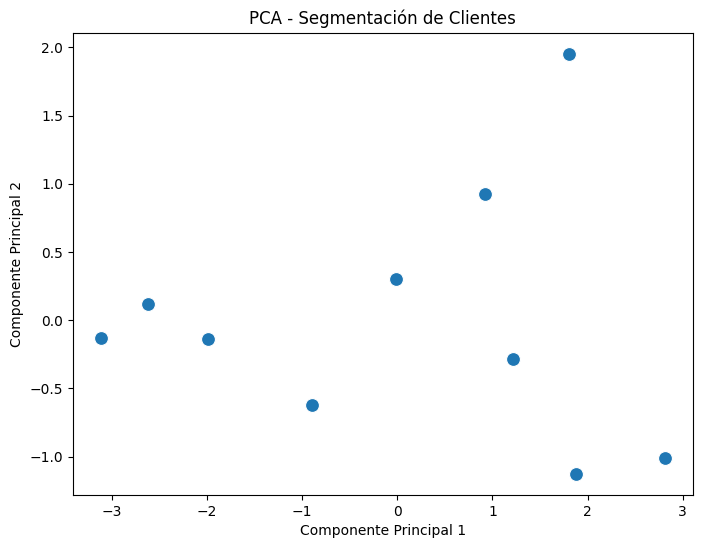

In [30]:
# Visualizar los resultados de PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, s=100)
plt.title('PCA - Segmentación de Clientes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


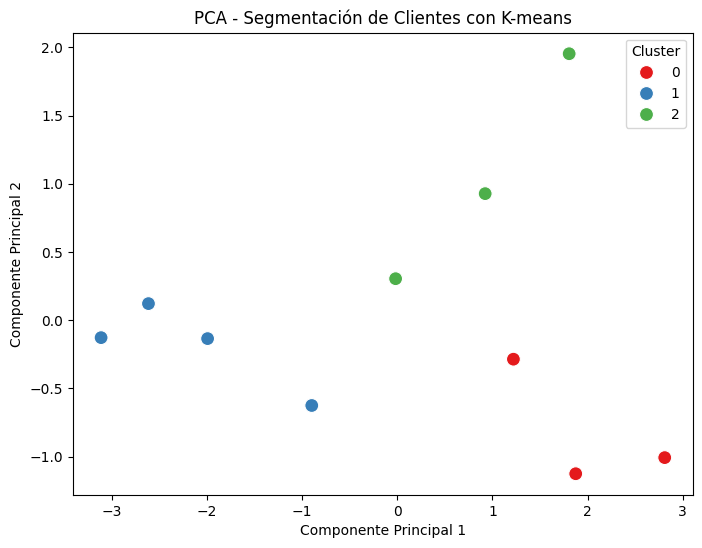

In [32]:
from sklearn.cluster import KMeans

# Aplicar K-means para 3 clusters (por ejemplo)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_pca)

# Añadir los clusters al DataFrame de PCA
df_pca['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=df_pca, s=100)
plt.title('PCA - Segmentación de Clientes con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [40]:
# Ver los clientes en el grupo 0
grupo_0 = df_pca[df_pca['Cluster'] == 0]

# Ver los clientes en el grupo 1
grupo_1 = df_pca[df_pca['Cluster'] == 1]

# Ver los clientes en el grupo 2
grupo_2 = df_pca[df_pca['Cluster'] == 2]

# También puedes ver el DataFrame completo con las etiquetas de los clusters
print(df_pca)


        PC1       PC2  Cluster
0 -2.615713  0.121606        1
1  0.924111  0.927757        2
2  1.876045 -1.125520        0
3 -3.113889 -0.127891        1
4  1.807042  1.953449        2
5 -0.017499  0.304214        2
6  1.221140 -0.285905        0
7 -0.898879 -0.625320        1
8  2.811756 -1.007441        0
9 -1.994115 -0.134948        1


In [42]:
df_final = pd.concat([df, df_pca], axis=1)

# Mostrar el DataFrame combinado
print(df_final)

   Edad  Ingresos  Num_Compras  Tiempo_Sitio  Num_Productos_Vistos       PC1  \
0    22     30000            5            30                    10 -2.615713   
1    35     70000           15            60                    20  0.924111   
2    58     80000           10            45                    30  1.876045   
3    24     25000            4            20                     8 -3.113889   
4    45     50000           20            70                    25  1.807042   
5    33     60000           10            55                    18 -0.017499   
6    50     75000           12            50                    22  1.221140   
7    40     60000            7            35                    12 -0.898879   
8    60     90000            9            80                    28  2.811756   
9    25     40000            6            25                    15 -1.994115   

        PC2  Cluster  
0  0.121606        1  
1  0.927757        2  
2 -1.125520        0  
3 -0.127891        1  
4  1

In [43]:
# Ver las estadísticas de cada grupo
print(df_final.groupby('Cluster').mean())


              Edad      Ingresos  Num_Compras  Tiempo_Sitio  \
Cluster                                                       
0        56.000000  81666.666667    10.333333     58.333333   
1        27.750000  38750.000000     5.500000     27.500000   
2        37.666667  60000.000000    15.000000     61.666667   

         Num_Productos_Vistos       PC1       PC2  
Cluster                                            
0                   26.666667  1.969647 -0.806289  
1                   11.250000 -2.155649 -0.191638  
2                   21.000000  0.904552  1.061807  


In [ ]:
# Cargar los datos Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Ver las primeras filas
df.head()

In [ ]:
# Cargar los datos Wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Ver las primeras filas del conjunto de datos
df.head()

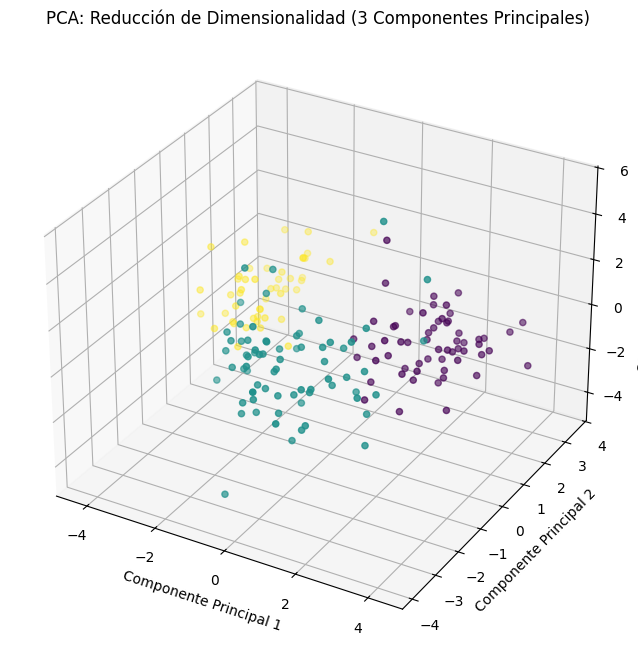

In [21]:
#Ejemplo para graficar 3 componentes principales

# Aplicar PCA para reducir a 3 dimensiones
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# Graficar los 3 primeros componentes principales en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D
ax.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], c=wine.target, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

ax.set_title('PCA: Reducción de Dimensionalidad (3 Componentes Principales)')
plt.show()
